<h1>Introduction</h1>

<h4>Siemens Limited has a vast presence in India with its sales offices being located in 17 prominent cities of the country. Being an employee of Siemens, it was quite tempting for me to do my final Capstone Project of IBM Data Science Specialization on a topic which is related to Siemens Ltd. in one way or the other. Since I am a part of the Strategic Sales department of the organization, interacting with the 17 offices on day to day basis is a crucial aspect of the job. Naturally, I wanted to walk the last leg of the Data Science journey by performing a location analysis on the 17 locations. 

The objective of this exercise is to obtain the geographical coordinates of the 17 Siemens sales offices, and identify the venues in a radius of 2 kilometers around these locations using the Foursquare API. Based on the information obtained, we will use a Machine Learning algorithm to draw interesting parallels between the 17 sales offices. Not only that, we will select an office which has the highest amount of venues and analyze it.</h4>

Let's import all the necessary libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

# install wordcloud
!conda install -c conda-forge wordcloud==1.4.1 --yes
# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

import matplotlib as plt
import matplotlib.pyplot as pyplt
import seaborn as sns

print('Libraries imported.')

Libraries imported.


In [4]:
!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    scikit-learn-0.20.1        |   py36h22eb022_0         5.7 MB
    liblapack-3.8.0            |      11_openblas          10 KB  conda-forge
    liblapacke-3.8.0           |      11_openblas          10 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    libopenblas-0.3.6          |       h5a2b251_2         7.7 MB
    numpy-1.17.3               |   py36h95a1406_0         5.2 MB  conda-forge
    lib

<h1>Data</h1>

<h4>We begin with a simple CSV file which contains the list of 17 Siemens Office Cities along with their respective Office locations. with the help of the Nominatim fucntion, we will identify the geographical coordinates of the office locations. Then with the help of Foursquare API, we will identify various venues, their geographical coordinates, categories, etc. and combine with out original CSV file to further analyse the data.</h4>

In [5]:
df = pd.read_csv("Capstone Project_Siemens.csv")

In [6]:
df

,Office City,Office Location
0,Bangalore,"St Marks Road, Bangalore"
1,Hyderabad,"Saifabad, Hyderabad"
2,Visakhapatnam,Visakhapatnam
3,Chennai,Anna Salai
4,Coimbatore,Avarampalayam
5,Mumbai,Airoli
6,Ahmedabad,Navrangpura
7,Vadodara,Makarpura
8,Pune,"ICC Trade Tower, Pune"
9,Nagpur,"Ramdaspeth, Nagpur"


In [7]:
locator = Nominatim(user_agent="myGeocoder")
list_lat = []
list_long = []
for office_location in df["Office Location"]:
    location = locator.geocode(office_location)
    latitude = location.latitude
    longitude = location.longitude
    list_lat.append([latitude])
    list_long.append([longitude])
    #print(latitude, longitude)
df_lat = pd.DataFrame(list_lat, columns = ['Latitude'])
df_long = pd.DataFrame(list_long, columns = ['Longitude'])

In [8]:
df = pd.concat([df, df_lat, df_long], axis=1)

In [9]:
df

,Office City,Office Location,Latitude,Longitude
0,Bangalore,"St Marks Road, Bangalore",12.977906,77.602201
1,Hyderabad,"Saifabad, Hyderabad",17.404788,78.465837
2,Visakhapatnam,Visakhapatnam,17.723128,83.301284
3,Chennai,Anna Salai,12.890548,79.122963
4,Coimbatore,Avarampalayam,11.029412,76.985465
5,Mumbai,Airoli,19.158272,72.996709
6,Ahmedabad,Navrangpura,23.036000,72.564343
7,Vadodara,Makarpura,22.233662,73.175933
8,Pune,"ICC Trade Tower, Pune",18.535662,73.829864
9,Nagpur,"Ramdaspeth, Nagpur",21.136585,79.074987


<h1>Methodology</h1>

<h5>This section consists of various code snippets which perform various analyses. Description of the same has been provided before the snippet</h5>

Now let's plot these 17 office locations on a map of India

In [10]:
locator = Nominatim(user_agent="myGeocoder")
location = locator.geocode("India")
print("Latitude = {}, Longitude = {}".format(location.latitude, location.longitude))

Latitude = 22.3511148, Longitude = 78.6677428


In [11]:
map_india = folium.Map(location=[latitude, longitude], zoom_start=5)

#Add Siemens Cities to India Map
for lat, lng, office_city, office_location in zip(df['Latitude'], df['Longitude'], df['Office City'], df['Office Location']):
    label = '{}, {}'.format(office_city, office_location)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_india)  
    
map_india

Now, it is time to use the Foursquare API. We begin by providing the client id and client secret

In [12]:
CLIENT_ID = 'LVFAIQW4DAICZN0BXPEM5AVDE3K34A53NYR10H21TRDMWXNY' # your Foursquare ID
CLIENT_SECRET = 'QTOIRFKYIWNZOVNVUWVI4WAYAD3IVTPI4GIXW2OXROGAC5HI' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: LVFAIQW4DAICZN0BXPEM5AVDE3K34A53NYR10H21TRDMWXNY
CLIENT_SECRET:QTOIRFKYIWNZOVNVUWVI4WAYAD3IVTPI4GIXW2OXROGAC5HI


We know that all the information is in the *items* key. Before we proceed, let's borrow the **get_category_type** function from the Foursquare lab.

In [13]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we will identify all the venues and their details in a radius of 2 kms around each office

In [14]:
def getNearbyVenues(names, latitudes, longitudes, radius=2000, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
    
    # return a list first, then transform the entire list to a dataframe. 
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Office Location', 
                  'Office Location Latitude', 
                  'Office Location Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    
    return(nearby_venues)

In [15]:
Office_venues = getNearbyVenues(names=df['Office Location'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

In [16]:
Office_venues.head()

,Office Location,Office Location Latitude,Office Location Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"St Marks Road, Bangalore",12.977906,77.602201,Hard Rock Cafe Bengaluru,12.976389,77.601468,American Restaurant
1,"St Marks Road, Bangalore",12.977906,77.602201,M. Chinnaswamy Stadium,12.978144,77.599223,Cricket Ground
2,"St Marks Road, Bangalore",12.977906,77.602201,Church Street Social,12.975559,77.602579,Pub
3,"St Marks Road, Bangalore",12.977906,77.602201,M.G Road Boulevard,12.975771,77.603979,Plaza
4,"St Marks Road, Bangalore",12.977906,77.602201,Blossom Book House,12.975042,77.604813,Bookstore


Let's see how many venues are there around each office

In [17]:
Office_venues.groupby('Office Location').count()

,Office Location Latitude,Office Location Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Office Location,,,,,,
"Acropolis Mall, Kolkata",15,15,15,15,15,15
Airoli,21,21,21,21,21,21
Anna Salai,7,7,7,7,7,7
Ashok Nagar Jaipur,58,58,58,58,58,58
Avarampalayam,21,21,21,21,21,21
Bistupur,11,11,11,11,11,11
Gomti Nagar,17,17,17,17,17,17
"ICC Trade Tower, Pune",90,90,90,90,90,90
Makarpura,4,4,4,4,4,4


In [18]:
print('There are {} uniques categories.'.format(len(Office_venues['Venue Category'].unique())))

There are 142 uniques categories.


It is so interesting to see that certain office locations have as high as 100 venues around them and some have as low as 4 or 5.

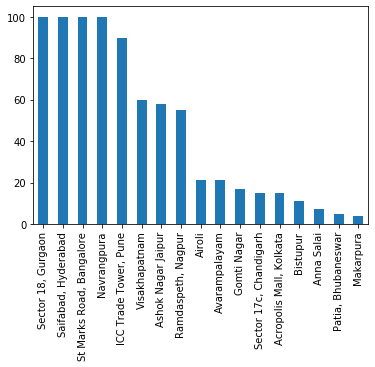

In [20]:
Office_venues['Office Location'].value_counts().plot(kind='bar')

We begin the process of analysing each and every office location and their venues

In [21]:
# one hot encoding
office_onehot = pd.get_dummies(Office_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
office_onehot['Office Location'] = Office_venues['Office Location'] 

# move neighborhood column to the first column
fixed_columns = [office_onehot.columns[-1]] + list(office_onehot.columns[:-1])
office_onehot = office_onehot[fixed_columns]

office_onehot.head()

,Office Location,ATM,Afghan Restaurant,Airport,American Restaurant,Andhra Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Bed & Breakfast,Bistro,Bookstore,Bowling Alley,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burmese Restaurant,Bus Station,Café,Cantonese Restaurant,Chaat Place,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Convenience Store,Cricket Ground,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Dhaba,Diner,Donut Shop,Eastern European Restaurant,Electronics Store,Fabric Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Food,Food Court,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Gastropub,Gourmet Shop,Gym,Gym / Fitness Center,Historic Site,Hockey Field,Hookah Bar,Hostel,Hotel,Hotel Bar,Hyderabadi Restaurant,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indian Sweet Shop,Indie Movie Theater,Indie Theater,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Lounge,Maharashtrian Restaurant,Market,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Moroccan Restaurant,Motel,Motorcycle Shop,Movie Theater,Mughlai Restaurant,Multicuisine Indian Restaurant,Multiplex,Museum,Neighborhood,New American Restaurant,Nightclub,Noodle House,North Indian Restaurant,Optical Shop,Outdoors & Recreation,Park,Performing Arts Venue,Pizza Place,Platform,Plaza,Portuguese Restaurant,Pub,Recreation Center,Residential Building (Apartment / Condo),Rest Area,Restaurant,Road,Sandwich Place,Scenic Lookout,Science Museum,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Smoke Shop,Snack Place,Soccer Stadium,South Indian Restaurant,Spa,Stadium,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Tapas Restaurant,Tea Room,Theater,Theme Park,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Wine Bar,Women's Store,Zoo
0,"St Marks Road, Bangalore",0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"St Marks Road, Bangalore",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"St Marks Road, Bangalore",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"St Marks Road, Bangalore",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"St Marks Road, Bangalore",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
office_onehot.shape

(779, 143)

In [22]:
office_grouped = office_onehot.groupby('Office Location').mean().reset_index()
office_grouped

,Office Location,ATM,Afghan Restaurant,Airport,American Restaurant,Andhra Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Bed & Breakfast,Bistro,Bookstore,Bowling Alley,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burmese Restaurant,Bus Station,Café,Cantonese Restaurant,Chaat Place,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Convenience Store,Cricket Ground,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Dhaba,Diner,Donut Shop,Eastern European Restaurant,Electronics Store,Fabric Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Food,Food Court,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Gastropub,Gourmet Shop,Gym,Gym / Fitness Center,Historic Site,Hockey Field,Hookah Bar,Hostel,Hotel,Hotel Bar,Hyderabadi Restaurant,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indian Sweet Shop,Indie Movie Theater,Indie Theater,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Lounge,Maharashtrian Restaurant,Market,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Moroccan Restaurant,Motel,Motorcycle Shop,Movie Theater,Mughlai Restaurant,Multicuisine Indian Restaurant,Multiplex,Museum,Neighborhood,New American Restaurant,Nightclub,Noodle House,North Indian Restaurant,Optical Shop,Outdoors & Recreation,Park,Performing Arts Venue,Pizza Place,Platform,Plaza,Portuguese Restaurant,Pub,Recreation Center,Residential Building (Apartment / Condo),Rest Area,Restaurant,Road,Sandwich Place,Scenic Lookout,Science Museum,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Smoke Shop,Snack Place,Soccer Stadium,South Indian Restaurant,Spa,Stadium,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Tapas Restaurant,Tea Room,Theater,Theme Park,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Wine Bar,Women's Store,Zoo
0,"Acropolis Mall, Kolkata",0.00,0.00,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.066667,0.00,0.00,0.066667,0.066667,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.066667,0.133333,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.066667,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.133333,0.000000,0.00,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.066667,0.000000,0.066667,0.000000,0.00,0.00,0.000000,0.00,0.066667,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.066667,0.00,0.00,0.000000,0.00,0.000000,0.066667,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
1,Airoli,0.00,0.00,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.00,0.047619,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.047619,0.00,0.047619,0.047619,0.00,0.00,0.047619,0.000000,0.047619,0.047619,0.00,0.00,0.000000,0.00,0.000000,0.047619,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.142857,0.00,0.000000,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.095238,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.047619,0.047619,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.047619,

In [21]:
office_grouped.shape

(17, 143)

Let's print the top 5 locations of all 17 locations

In [23]:
num_top_venues = 5

for hood in office_grouped['Office Location']:
    print("----"+hood+"----")
    temp = office_grouped[office_grouped['Office Location'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Acropolis Mall, Kolkata----
          venue  freq
0         Hotel  0.13
1         Dhaba  0.13
2  Dessert Shop  0.07
3          Café  0.07
4     Multiplex  0.07


----Airoli----
                  venue  freq
0  Fast Food Restaurant  0.14
1                   Gym  0.10
2              Platform  0.05
3           Pizza Place  0.05
4                  Café  0.05


----Anna Salai----
               venue  freq
0    Motorcycle Shop  0.14
1        Pizza Place  0.14
2  Indian Restaurant  0.14
3              Motel  0.14
4     Ice Cream Shop  0.14


----Ashok Nagar Jaipur----
               venue  freq
0              Hotel  0.16
1  Indian Restaurant  0.12
2      Historic Site  0.10
3        Coffee Shop  0.05
4             Market  0.05


----Avarampalayam----
                 venue  freq
0    Indian Restaurant  0.43
1               Bakery  0.10
2       Ice Cream Shop  0.05
3  Fried Chicken Joint  0.05
4          Pizza Place  0.05


----Bistupur----
            venue  freq
0           Hotel  0.27


In [24]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

To proceed further, we will identify the top 10 venues around each office location

In [25]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Office Location']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
office_venues_sorted = pd.DataFrame(columns=columns)
office_venues_sorted['Office Location'] = office_grouped['Office Location']

for ind in np.arange(office_grouped.shape[0]):
    office_venues_sorted.iloc[ind, 1:] = return_most_common_venues(office_grouped.iloc[ind, :], num_top_venues)

In [26]:
office_venues_sorted

,Office Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Acropolis Mall, Kolkata",Dhaba,Hotel,Shopping Mall,Dessert Shop,Fried Chicken Joint,Mughlai Restaurant,Café,Multiplex,Sandwich Place,Chinese Restaurant
1,Airoli,Fast Food Restaurant,Gym,Platform,Burger Joint,Café,Department Store,Sandwich Place,Restaurant,Chinese Restaurant,Cocktail Bar
2,Anna Salai,Motel,Ice Cream Shop,Indian Restaurant,Pizza Place,Café,Motorcycle Shop,Supermarket,Farmers Market,French Restaurant,Food Court
3,Ashok Nagar Jaipur,Hotel,Indian Restaurant,Historic Site,Market,Coffee Shop,Café,Fast Food Restaurant,Zoo,Ice Cream Shop,Park
4,Avarampalayam,Indian Restaurant,Bakery,Fried Chicken Joint,Farmers Market,Ice Cream Shop,Vegetarian / Vegan Restaurant,Pizza Place,Coffee Shop,Tea Room,Motel
5,Bistupur,Hotel,Indian Restaurant,Bakery,Restaurant,Sandwich Place,Café,Market,Pizza Place,Italian Restaurant,Hookah Bar
6,Gomti Nagar,Indian Restaurant,Hotel,Café,Fast Food Restaurant,Shopping Mall,Bakery,Department Store,Pizza Place,Plaza,Clothing Store
7,"ICC Trade Tower, Pune",Indian Restaurant,Coffee Shop,Lounge,Restaurant,Chinese Restaurant,Italian Restaurant,Fast Food Restaurant,Café,Snack Place,Asian Restaurant
8,Makarpura,ATM,Restaurant,Tapas Restaurant,Electronics Store,Dhaba,Diner,Donut Shop,Dessert Shop,Eastern European Restaurant,Fruit & Vegetable Store
9,Navrangpura,Café,Indian Restaurant,Hotel,Fast Food Restaurant,Dessert Shop,Pizza Place,Sandwich Place,Coffee Shop,Tea Room,Asian Restaurant


<h1>Results</h1>

Now comes the interesting part of clustering the office locations. I have selected the number of clusters to be 6

In [27]:
# set number of clusters
kclusters = 6

office_grouped_clustering = office_grouped.drop('Office Location', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(office_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 3, 0, 1, 5, 1, 3, 3, 2, 3], dtype=int32)

In [28]:
# add clustering labels
office_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

office_merged = df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
office_merged = office_merged.join(office_venues_sorted.set_index('Office Location'), on='Office Location')

office_merged.head() # check the last columns!

,Office City,Office Location,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bangalore,"St Marks Road, Bangalore",12.977906,77.602201,3,Indian Restaurant,Hotel,Lounge,Pub,Ice Cream Shop,Brewery,Chinese Restaurant,Italian Restaurant,Breakfast Spot,Shopping Mall
1,Hyderabad,"Saifabad, Hyderabad",17.404788,78.465837,3,Indian Restaurant,Hotel,Café,Multiplex,Bakery,Fast Food Restaurant,Chinese Restaurant,Ice Cream Shop,Restaurant,Hotel Bar
2,Visakhapatnam,Visakhapatnam,17.723128,83.301284,3,Hotel,Indian Restaurant,Café,Indie Movie Theater,Platform,Restaurant,Train Station,Italian Restaurant,Pizza Place,Movie Theater
3,Chennai,Anna Salai,12.890548,79.122963,0,Motel,Ice Cream Shop,Indian Restaurant,Pizza Place,Café,Motorcycle Shop,Supermarket,Farmers Market,French Restaurant,Food Court
4,Coimbatore,Avarampalayam,11.029412,76.985465,5,Indian Restaurant,Bakery,Fried Chicken Joint,Farmers Market,Ice Cream Shop,Vegetarian / Vegan Restaurant,Pizza Place,Coffee Shop,Tea Room,Motel


Let's analyze the 1st most common venues of each cluster

In [29]:
clus = office_merged[['Cluster Labels', '1st Most Common Venue']]
clus

,Cluster Labels,1st Most Common Venue
0,3,Indian Restaurant
1,3,Indian Restaurant
2,3,Hotel
3,0,Motel
4,5,Indian Restaurant
5,3,Fast Food Restaurant
6,3,Café
7,2,ATM
8,3,Indian Restaurant
9,3,Shopping Mall


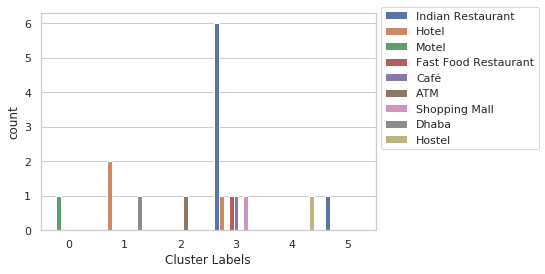

In [46]:
sns.set(style="whitegrid")
g = sns.countplot(x="Cluster Labels", hue= '1st Most Common Venue', data = clus)
g.legend(loc='center left', bbox_to_anchor=(1, 0.7), ncol=1)

All I can is that people who work in office locations of the 3rd cluster, are quite lucky ;). Let's plot the offices once again and highlight the cluster they fall in

In [59]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=5)

# set color scheme for the clusters
x = np.arange(kclusters)
print('x:', x)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
print('ys:', ys)
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#print(colors_array)
rainbow = [colors.rgb2hex(i) for i in colors_array]
print(rainbow)

# add markers to the map
markers_colors = []
for lat, lon, nb, ofc, cluster in zip(office_merged['Latitude'], office_merged['Longitude'], office_merged['Office Location'], office_merged['Office City'], office_merged['Cluster Labels']):
    label = folium.Popup(str(nb) + ", " + str(ofc) + "," + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

x: [0 1 2 3 4 5]
ys: [array([0, 1, 2, 3, 4, 5]), array([ 1,  3,  7, 13, 21, 31]), array([  2,   7,  20,  41,  70, 107]), array([  3,  13,  41,  87, 151, 233]), array([  4,  21,  70, 151, 264, 409]), array([  5,  31, 107, 233, 409, 635])]
['#8000ff', '#1996f3', '#4df3ce', '#b2f396', '#ff964f', '#ff0000']


Let's see the contents of each cluster and try to understand why have they been clustered in such a peculiar fashion

In [49]:
office_merged.loc[office_merged['Cluster Labels'] == 0, office_merged.columns[[0,1] + list(range(5, office_merged.shape[1]))]]

,Office City,Office Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Chennai,Anna Salai,Motel,Ice Cream Shop,Indian Restaurant,Pizza Place,Café,Motorcycle Shop,Supermarket,Farmers Market,French Restaurant,Food Court


Hmmm, Chennai seems to be the only place where the 1st most common venue is a motel. As a result, it is present in a separate cluster

In [50]:
office_merged.loc[office_merged['Cluster Labels'] == 1, office_merged.columns[[0,1] + list(range(5, office_merged.shape[1]))]]

,Office City,Office Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,Jaipur,Ashok Nagar Jaipur,Hotel,Indian Restaurant,Historic Site,Market,Coffee Shop,Café,Fast Food Restaurant,Zoo,Ice Cream Shop,Park
14,Kolkata,"Acropolis Mall, Kolkata",Dhaba,Hotel,Shopping Mall,Dessert Shop,Fried Chicken Joint,Mughlai Restaurant,Café,Multiplex,Sandwich Place,Chinese Restaurant
16,Jamshedpur,Bistupur,Hotel,Indian Restaurant,Bakery,Restaurant,Sandwich Place,Café,Market,Pizza Place,Italian Restaurant,Hookah Bar


If you observe clearly, these 3 offices seem to be in locations where there are venues other than just restaurants and cafes, like - Market, Multiplex, Shopping Mall, Zoo, Park, etc. 

In [51]:
office_merged.loc[office_merged['Cluster Labels'] == 2, office_merged.columns[[0,1] + list(range(5, office_merged.shape[1]))]]

,Office City,Office Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Vadodara,Makarpura,ATM,Restaurant,Tapas Restaurant,Electronics Store,Dhaba,Diner,Donut Shop,Dessert Shop,Eastern European Restaurant,Fruit & Vegetable Store


Ah, this is my 2nd favorite cluster! Why, you may ask. Well, it is because this is the only location where the 1st most common venue is an ATM.

In [52]:
office_merged.loc[office_merged['Cluster Labels'] == 3, office_merged.columns[[0,1] + list(range(5, office_merged.shape[1]))]]

,Office City,Office Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bangalore,"St Marks Road, Bangalore",Indian Restaurant,Hotel,Lounge,Pub,Ice Cream Shop,Brewery,Chinese Restaurant,Italian Restaurant,Breakfast Spot,Shopping Mall
1,Hyderabad,"Saifabad, Hyderabad",Indian Restaurant,Hotel,Café,Multiplex,Bakery,Fast Food Restaurant,Chinese Restaurant,Ice Cream Shop,Restaurant,Hotel Bar
2,Visakhapatnam,Visakhapatnam,Hotel,Indian Restaurant,Café,Indie Movie Theater,Platform,Restaurant,Train Station,Italian Restaurant,Pizza Place,Movie Theater
5,Mumbai,Airoli,Fast Food Restaurant,Gym,Platform,Burger Joint,Café,Department Store,Sandwich Place,Restaurant,Chinese Restaurant,Cocktail Bar
6,Ahmedabad,Navrangpura,Café,Indian Restaurant,Hotel,Fast Food Restaurant,Dessert Shop,Pizza Place,Sandwich Place,Coffee Shop,Tea Room,Asian Restaurant
8,Pune,"ICC Trade Tower, Pune",Indian Restaurant,Coffee Shop,Lounge,Restaurant,Chinese Restaurant,Italian Restaurant,Fast Food Restaurant,Café,Snack Place,Asian Restaurant
9,Nagpur,"Ramdaspeth, Nagpur",Shopping Mall,Coffee Shop,Ice Cream Shop,Indian Restaurant,Snack Place,Restaurant,Clothing Store,Fast Food Restaurant,Café,Italian Restaurant
10,Delhi,"Sector 18, Gurgaon",Indian Restaurant,Café,Fast Food Restaurant,Pizza Place,Shopping Mall,Bar,Coffee Shop,Hotel,Asian Restaurant,Donut Shop
11,Chandigarh,"Sector 17c, Chandigarh",Indian Restaurant,Pizza Place,Hockey Field,Café,Miscellaneous Shop,Sandwich Place,Residential Building (Apartment / Condo),Shop & Service,Gym,Arcade
13,Lucknow,Gomti Nagar,Indian Restaurant,Hotel,Café,Fast Food Restaurant,Shopping Mall,Bakery,Department Store,Pizza Place,Plaza,Clothing Store


This is the most congested cluster of all, and interestingly houses some really busy office locations. As you can see, all the places have cafes in them.

In [53]:
office_merged.loc[office_merged['Cluster Labels'] == 4, office_merged.columns[[0,1] + list(range(5, office_merged.shape[1]))]]

,Office City,Office Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
15,Bhubaneswar,"Patia, Bhubaneswar",Hostel,Pizza Place,Café,Snack Place,Dhaba,Diner,Donut Shop,Dessert Shop,Eastern European Restaurant,Fried Chicken Joint


Hmmm, Bhubaneswar seems to be the only place where the 1st most common venue is a hostel. As a result, it is present in a separate cluster

In [54]:
office_merged.loc[office_merged['Cluster Labels'] == 5, office_merged.columns[[0,1] + list(range(5, office_merged.shape[1]))]]

,Office City,Office Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Coimbatore,Avarampalayam,Indian Restaurant,Bakery,Fried Chicken Joint,Farmers Market,Ice Cream Shop,Vegetarian / Vegan Restaurant,Pizza Place,Coffee Shop,Tea Room,Motel


Hmmm, Coimbatore seems to be the only place which has a Farmer's market and a Vegan restaurant. As a result, it is present in a separate cluster

As promised earlier, it is time to analyse the venues around a particular location. Well, I have chosen Bangalore as an option as it happens to have quite many venues around it.

In [55]:
office_bangalore = Office_venues[Office_venues['Office Location'] == 'St Marks Road, Bangalore']
office_bangalore.shape

(100, 7)

In [78]:
office_bangalore['Venue Category'].value_counts().head()

Indian Restaurant    10
Hotel                 7
Lounge                6
Pub                   5
Ice Cream Shop        4
Name: Venue Category, dtype: int64

Why not create a wordcloud to see the most frequent places in Bangalore?

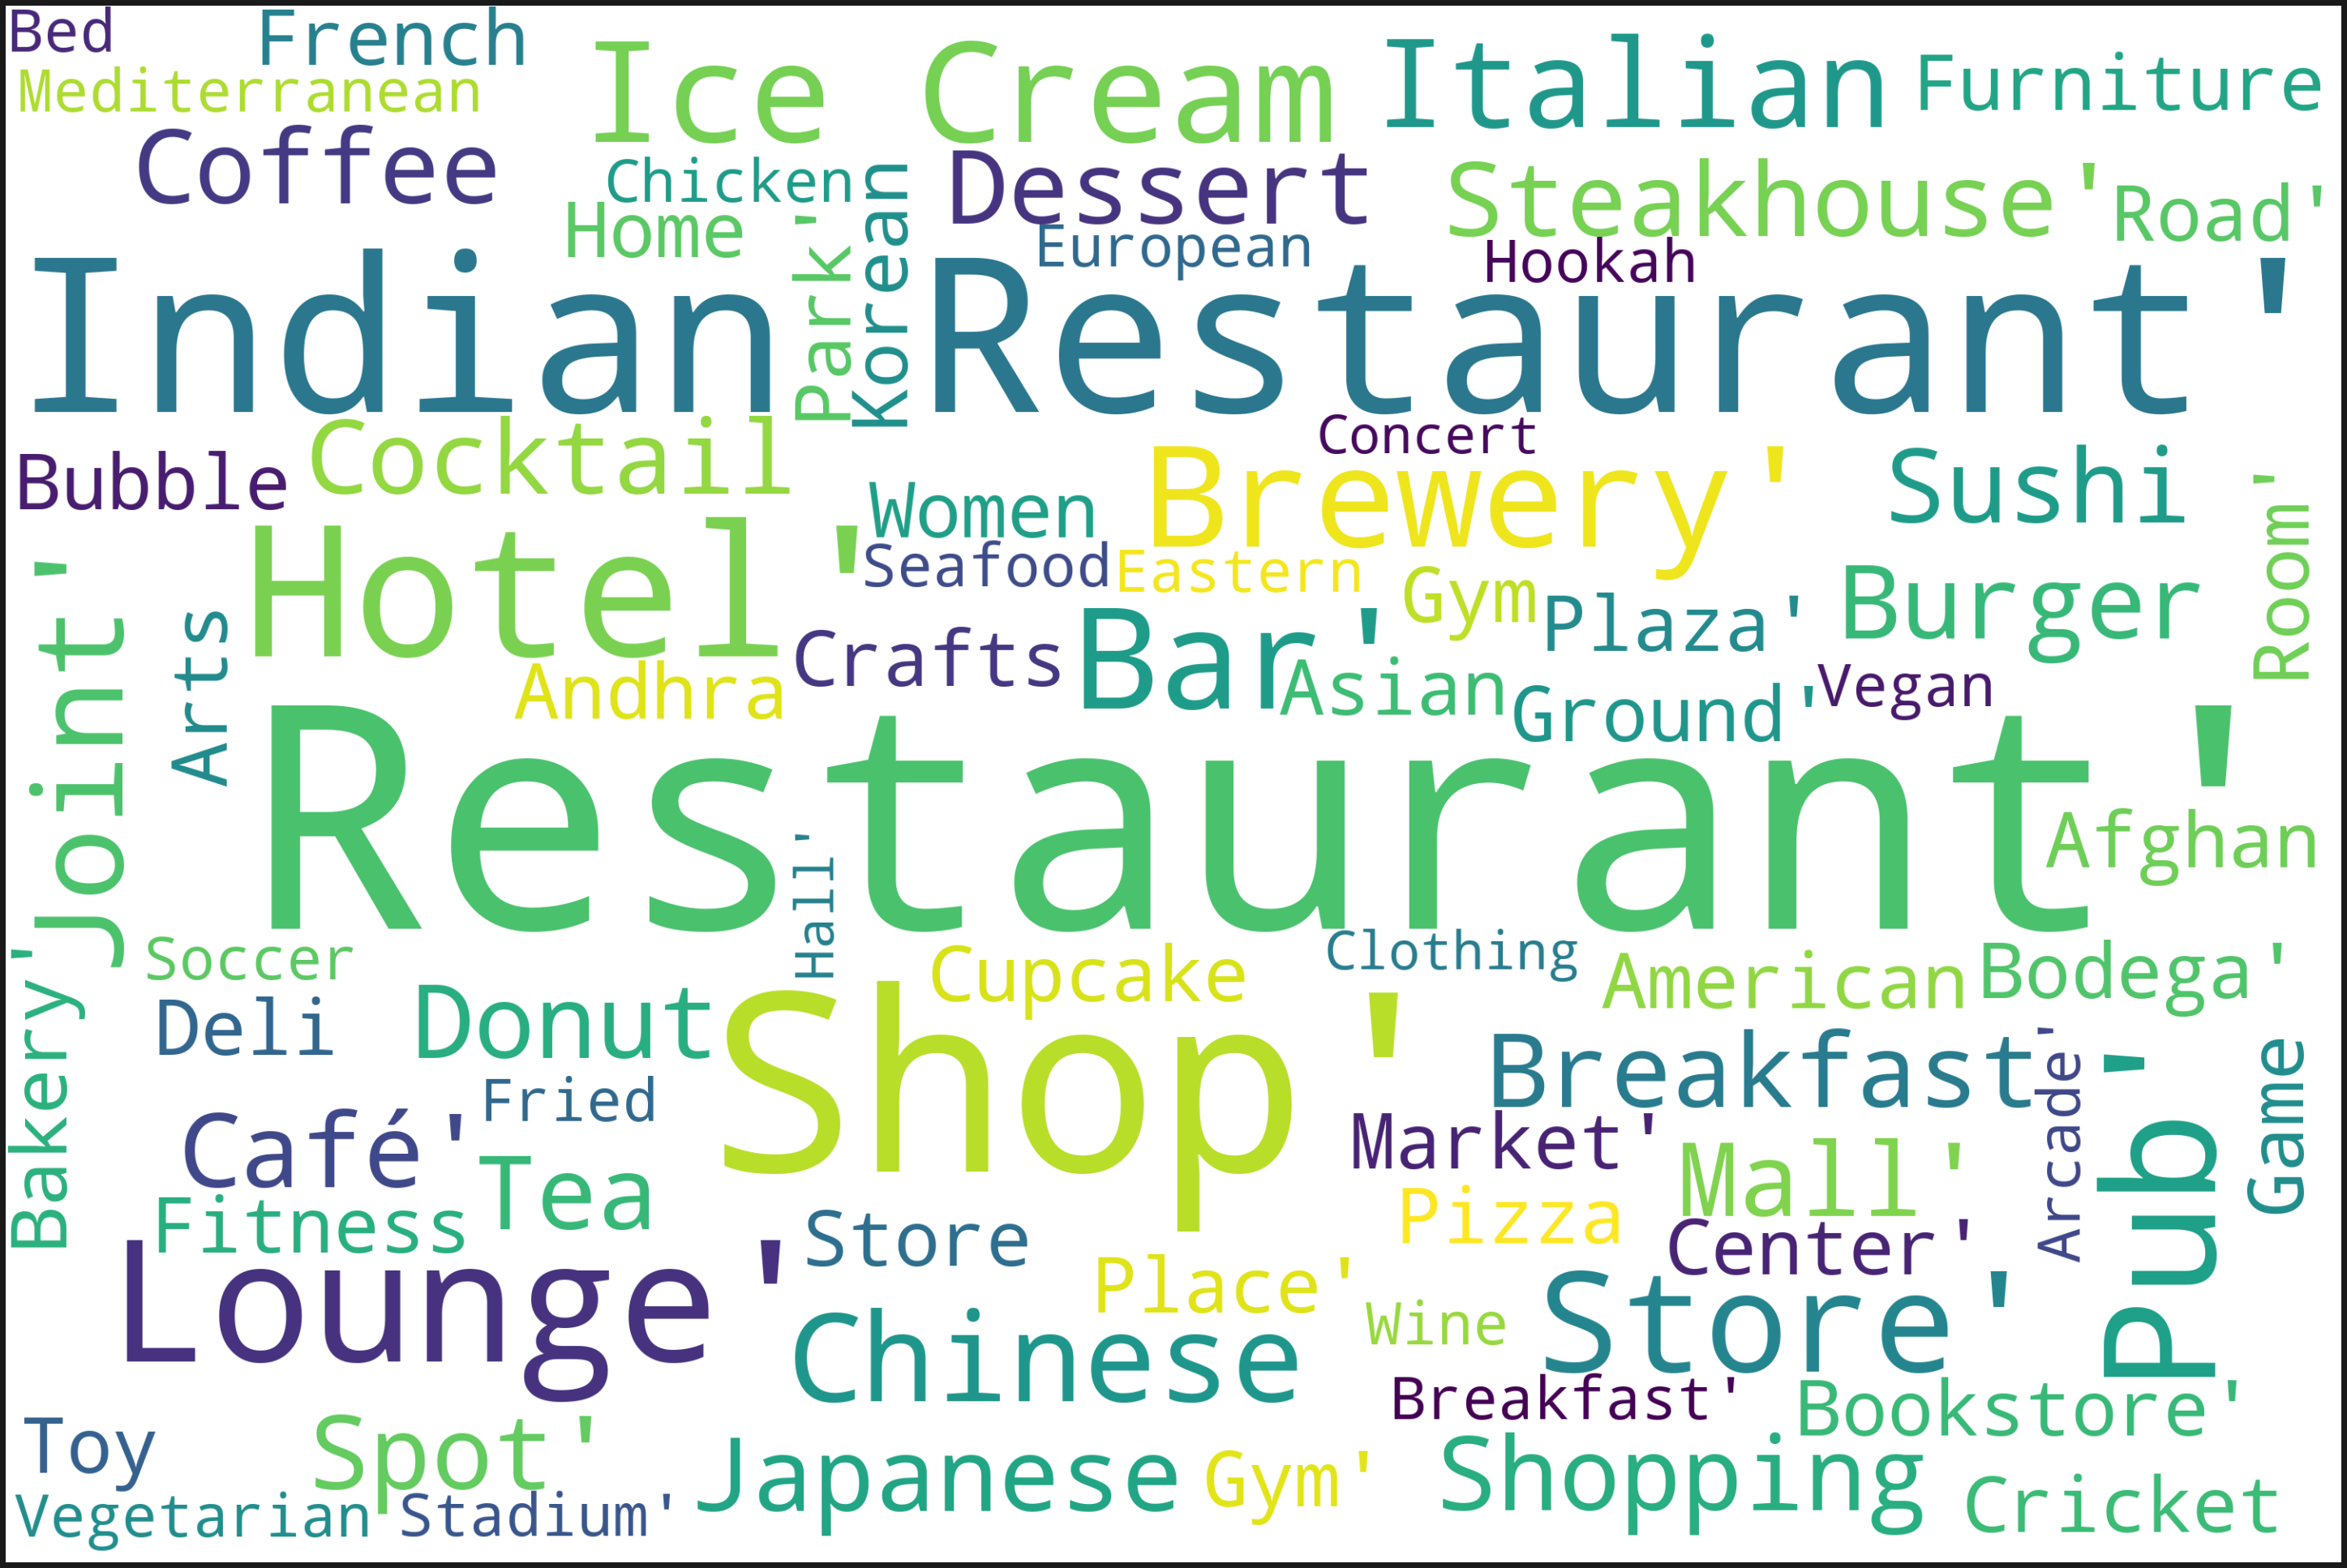

In [80]:
text = office_bangalore['Venue Category'].values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(text))
fig = pyplt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
pyplt.imshow(wordcloud, interpolation = 'bilinear')
pyplt.axis('off')
pyplt.tight_layout(pad=0)
pyplt.show()

Woah!! Clearly Bangalore is all about Restaurants, Breweries and Hotels :)

Now let's try to plot these places on the map of Bangalore. We will highlight the location of Siemens Bangalore with a red circle

In [67]:
url = 'https://api.foursquare.com/v2/venues/explore?client_id=LVFAIQW4DAICZN0BXPEM5AVDE3K34A53NYR10H21TRDMWXNY&client_secret=QTOIRFKYIWNZOVNVUWVI4WAYAD3IVTPI4GIXW2OXROGAC5HI&ll=12.977906,77.602201&v=20180604&radius=1000&limit=50'
url

'https://api.foursquare.com/v2/venues/explore?client_id=LVFAIQW4DAICZN0BXPEM5AVDE3K34A53NYR10H21TRDMWXNY&client_secret=QTOIRFKYIWNZOVNVUWVI4WAYAD3IVTPI4GIXW2OXROGAC5HI&ll=12.977906,77.602201&v=20180604&radius=1000&limit=50'

In [68]:
results = requests.get(url).json()
'There are {} places around Siemens Bangalore.'.format(len(results['response']['groups'][0]['items']))

'There are 50 places around Siemens Bangalore.'

In [69]:
items = results['response']['groups'][0]['items']
items[0]

{'reasons': {'count': 0,
  'items': [{'summary': 'This spot is popular',
    'type': 'general',
    'reasonName': 'globalInteractionReason'}]},
 'venue': {'id': '4b5aaef9f964a520b8d028e3',
  'name': 'Hard Rock Cafe Bengaluru',
  'location': {'address': '40 St. Marks Road',
   'crossStreet': 'St. Marks Rd',
   'lat': 12.9763894,
   'lng': 77.6014683,
   'labeledLatLngs': [{'label': 'display',
     'lat': 12.9763894,
     'lng': 77.6014683}],
   'distance': 186,
   'postalCode': '560001',
   'cc': 'IN',
   'city': 'Bangalore',
   'state': 'Karnātaka',
   'country': 'India',
   'formattedAddress': ['40 St. Marks Road (St. Marks Rd)',
    'Bangalore 560001',
    'Karnātaka',
    'India']},
  'categories': [{'id': '4bf58dd8d48988d14e941735',
    'name': 'American Restaurant',
    'pluralName': 'American Restaurants',
    'shortName': 'American',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_',
     'suffix': '.png'},
    'primary': True}],
  'photos': {'count':

In [70]:
dataframe = json_normalize(items) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# filter the category for each row
dataframe_filtered['venue.categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean columns
dataframe_filtered.columns = [col.split('.')[-1] for col in dataframe_filtered.columns]

dataframe_filtered.head(10)

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,neighborhood,id
0,Hard Rock Cafe Bengaluru,American Restaurant,40 St. Marks Road,St. Marks Rd,12.976389,77.601468,"[{'label': 'display', 'lat': 12.9763894, 'lng'...",186,560001,IN,Bangalore,Karnātaka,India,"[40 St. Marks Road (St. Marks Rd), Bangalore 5...",NaN,4b5aaef9f964a520b8d028e3
1,Church Street Social,Pub,"46/1, Cobalt Building, Church Street, Opposite...",Church Street,12.975559,77.602579,"[{'label': 'display', 'lat': 12.97555906906691...",264,560001,IN,Bangalore,Karnātaka,India,"[46/1, Cobalt Building, Church Street, Opposit...",NaN,5319e807498eef833aac3496
2,M. Chinnaswamy Stadium,Cricket Ground,Queens Rd,NaN,12.978144,77.599223,"[{'label': 'display', 'lat': 12.97814448139170...",324,560001,IN,Bangalore,Karnātaka,India,"[Queens Rd, Bangalore 560001, Karnātaka, India]",NaN,4b9f5637f964a5203f1d37e3
3,M.G Road Boulevard,Plaza,M. G. Road,NaN,12.975771,77.603979,"[{'label': 'display', 'lat': 12.9757705183477,...",306,560001,IN,Bangalore,Karnātaka,India,"[M. G. Road, Bangalore 560001, Karnātaka, India]",NaN,518d0e4a498e40ae5437e47d
4,The Entertainment Store,Toy / Game Store,NaN,NaN,12.975413,77.603045,"[{'label': 'display', 'lat': 12.97541254552654...",292,NaN,IN,NaN,NaN,India,[India],NaN,5177ca50e4b084e2c4ed3813
5,Blossom Book House,Bookstore,#84/6 Church St,NaN,12.975042,77.604813,"[{'label': 'display', 'lat': 12.97504195541442...",426,560001,IN,Bangalore,Karnātaka,India,"[#84/6 Church St, Bangalore 560001, Karnātaka,...",NaN,4c1643ce127f95213b2e2525
6,The 13th Floor,Lounge,"84, 13th Flr., Barton Centre, MG Rd.",NaN,12.975364,77.604995,"[{'label': 'display', 'lat': 12.97536363371280...",414,560001,IN,Bangalore,Karnātaka,India,"[84, 13th Flr., Barton Centre, MG Rd., Bangalo...",NaN,4bdc5f92fed22d7f79dc57c9
7,Samarkand,Afghan Restaurant,"66, Gem Plaza",Infantry Road,12.980616,77.604668,"[{'label': 'display', 'lat': 12.98061623054260...",403,NaN,IN,Bangalore,Karnātaka,India,"[66, Gem Plaza (Infantry Road), Bangalore, Kar...",NaN,4b5b302bf964a520bfe928e3
8,Koshy's,Indian Restaurant,"No 39, St. Marks Road",NaN,12.975727,77.601656,"[{'label': 'display', 'lat': 12.97572678874464...",249,560001,IN,Bangalore,Karnātaka,India,"[No 39, St. Marks Road, Bangalore 560001, Karn...",NaN,4b87c36df964a520caca31e3
9,Peppa Zzing,Burger Joint,"92, G 18, Kedia Arcade",Infantry Road,12.979700,77.605907,"[{'label': 'display', 'lat': 12.97970011778346...",448,NaN,IN,Bangalore,Karnātaka,India,"[92, G 18, Kedia Arcade (Infantry Road), Banga...",NaN,4cc6e99a0a8c95213bfebca6


In [71]:
venues_map = folium.Map(location=[12.977906,77.602201], zoom_start=15) # generate map centred around Ecco


# add Ecco as a red circle mark
folium.features.CircleMarker(
    [12.977906,77.602201],
    radius=10,
    popup='Siemens Bangalore',
    fill=True,
    color='red',
    fill_color='red',
    fill_opacity=0.6
    ).add_to(venues_map)


# add popular spots to the map as blue circle markers
for lat, lng, label, in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        popup= label,
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=0.6
        ).add_to(venues_map)

# display map
venues_map

I was working on this analysis at around 9:30 am in the morning which happens to be a breakfast time for me. So I thought I would like to find some trending venues in Bangalore around Siemens' office at this time in the morning. Let's see what happened

In [72]:
url = 'https://api.foursquare.com/v2/venues/trending?client_id=LVFAIQW4DAICZN0BXPEM5AVDE3K34A53NYR10H21TRDMWXNY&client_secret=QTOIRFKYIWNZOVNVUWVI4WAYAD3IVTPI4GIXW2OXROGAC5HI&ll=12.977906,77.602201&v=20180604&radius=1000&limit=50'
url

'https://api.foursquare.com/v2/venues/trending?client_id=LVFAIQW4DAICZN0BXPEM5AVDE3K34A53NYR10H21TRDMWXNY&client_secret=QTOIRFKYIWNZOVNVUWVI4WAYAD3IVTPI4GIXW2OXROGAC5HI&ll=12.977906,77.602201&v=20180604&radius=1000&limit=50'

In [73]:
# send GET request and get trending venues
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5dff2d750de0d9001c37da77'},
 'response': {'venues': []}}

In [74]:
if len(results['response']['venues']) == 0:
    trending_venues_df = 'No trending venues are available at the moment!'
    
else:
    trending_venues = results['response']['venues']
    trending_venues_df = json_normalize(trending_venues)

    # filter columns
    columns_filtered = ['name', 'categories'] + ['location.distance', 'location.city', 'location.postalCode', 'location.state', 'location.country', 'location.lat', 'location.lng']
    trending_venues_df = trending_venues_df.loc[:, columns_filtered]

    # filter the category for each row
    trending_venues_df['categories'] = trending_venues_df.apply(get_category_type, axis=1)

In [75]:
trending_venues_df

'No trending venues are available at the moment!'

Alas, there are no trending venues near Siemens Bangalore at 9:30 am on a Sunday morning. Don't people have breakfast in restaurants? Or is it that most nearby locations are pubs and generally don't open so early in the morning??

In [76]:
if len(results['response']['venues']) == 0:
    venues_map = 'Cannot generate visual as no trending venues are available at the moment!'

else:
    venues_map = folium.Map(location=[12.977906,77.602201], zoom_start=15) # generate map centred around Ecco


    # add Ecco as a red circle mark
    folium.features.CircleMarker(
        [12.977906,77.602201],
        radius=10,
        popup='Siemens Bangalore',
        fill=True,
        color='red',
        fill_color='red',
        fill_opacity=0.6
    ).add_to(venues_map)


    # add the trending venues as blue circle markers
    for lat, lng, label in zip(trending_venues_df['location.lat'], trending_venues_df['location.lng'], trending_venues_df['name']):
        folium.features.CircleMarker(
            [lat, lng],
            radius=5,
            poup=label,
            fill=True,
            color='blue',
            fill_color='blue',
            fill_opacity=0.6
        ).add_to(venues_map)

venues_map

'Cannot generate visual as no trending venues are available at the moment!'

<h1>Discussion</h1>

Our journey began with a identifying the geographical coordinates of the 17 sales offices of Siemens India. Then we identified the top 100 venues in a radius of 2 kms around these locations using the Foursquare API. This enabled us to perform the k means clustering so that we can identify the similarities and differences between the offices. It was interesting to see that certain offices which had unique venues like Hostels, Motels, ATMs, etc. were placed in different clusters as compared to the locations where most common venues were Restaurants, Cafes, etc. From clustering, we moved on to analysing one particular office location - Bangalore. We identified the nearest 50 venues and the most common ones were restaurants, pubs, breweries, etc. which is not surprising as Bangalore is famous for such outlets. However, it was quite interesting to see that there isn't much traction to these venues on a Sunday morning. So is there a business opportunity for a breakfast joint near Bangalore? 

<h1>Conclusion<\h1>

It has been quite a long journey from a small 2 column dataframe to identifying nearest 50 venues near an office location. We have identified that there are certain office locations which have as high as 100 venues around them, and unfortunately, there are certain locations which have only 4-5.


One thing that needs to be kept in mind is that no form of machine learning or analysis is fool proof. A lot is left to the way things are interpreted. I sincerely hope that I have done a decent job in collecting data, analysing and dissecting it, and concluding the analysis.